In [1]:
print("Hello World")

Hello World


In [6]:
import numpy as np

In [7]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

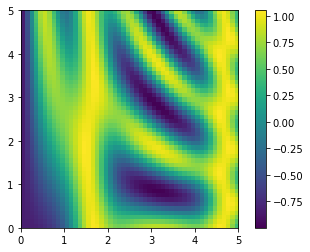

In [9]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

Задача №1

In [10]:
import pandas as pd

In [11]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
 names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],
 ['HR', 'Temp']],
 names=['subject', 'type'])

In [12]:
# Создаем имитационные данные
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [13]:
# Создаем объект DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  37.2  46.0  36.7  54.0  36.5
     2      39.0  36.6  20.0  38.9  35.0  37.6
2014 1      29.0  37.8  40.0  38.8  15.0  37.9
     2      41.0  38.0  42.0  36.3  38.0  38.7

Задача №2

In [2]:
plt.style.use('seaborn-white')

In [24]:
def f(x, y):
 return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [25]:
 x = np.linspace(0, 5, 50)
 y = np.linspace(0, 5, 40)
 X, Y = np.meshgrid(x, y)
 Z = f(X, Y)

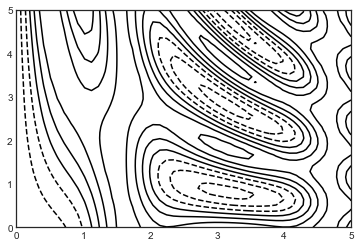

In [26]:
plt.contour(X, Y, Z, colors='black');

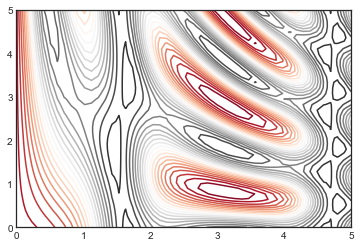

In [27]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

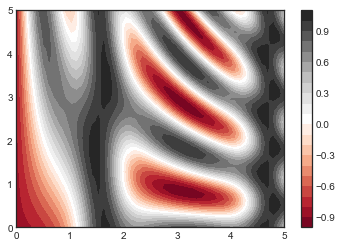

In [28]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

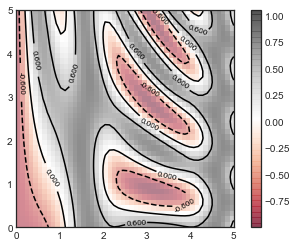

In [29]:
 contours = plt.contour(X, Y, Z, 3, colors='black')
 plt.clabel(contours, inline=True, fontsize=8)
 plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
 cmap='RdGy', alpha=0.5)
 plt.colorbar();

Задача №3

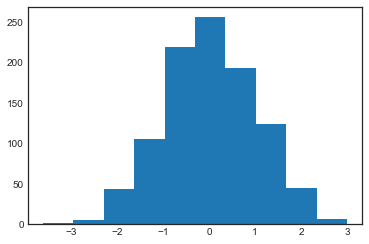

In [20]:
data = np.random.randn(1000)
plt.hist(data);

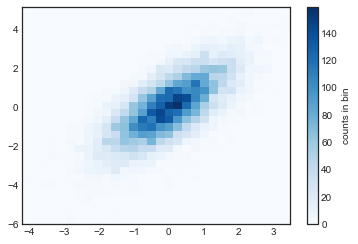

In [21]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin') # Количествво в интервале

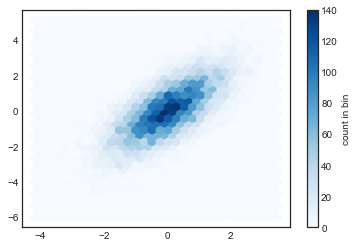

In [22]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin') # Количество в интервале

Задача №4: Ядерная оценка плотности распределения

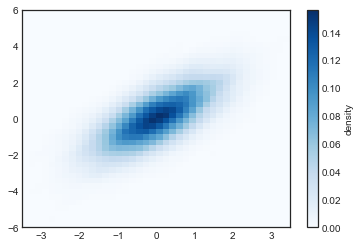

In [23]:
from scipy.stats import gaussian_kde

# Выполняем подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Вычисляем на регулярной координатной сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Выводим график результата в виде изображения
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto',
extent=[-3.5, 3.5, -6, 6],
cmap='Blues')
cb = plt.colorbar()

cb.set_label("density") # Плотность

Задача №5: Задание легенды для точек различного размера.

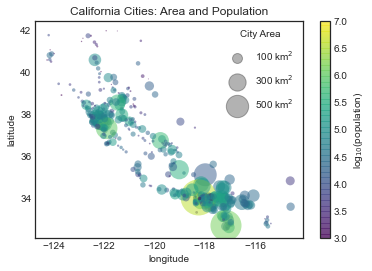

In [40]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

# plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

Задача №6: Ограничения и расширенные возможности 
по использованию цветов

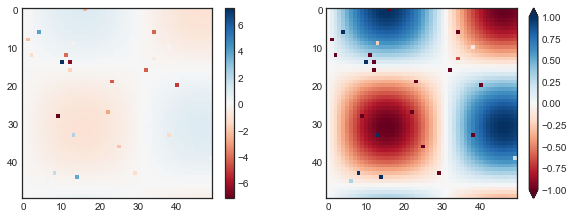

In [42]:
# создаем шум размером 1% от пикселов изображения
I = np.sin(x) * np.cos(x[:, np.newaxis])
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

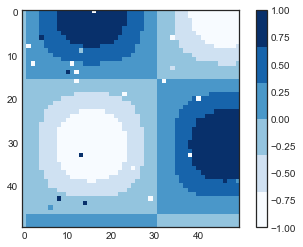

In [43]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

Пример:рассмотрим интересную визуализацию данных с рукописными 
цифрами

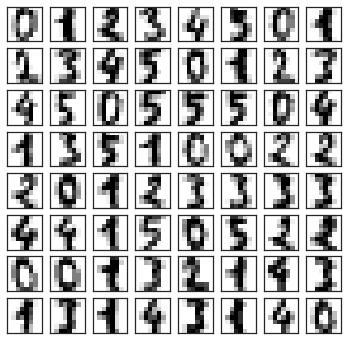

In [46]:
# Загружаем изображения цифр от 0 до 5 и визуализируем некоторые из них
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

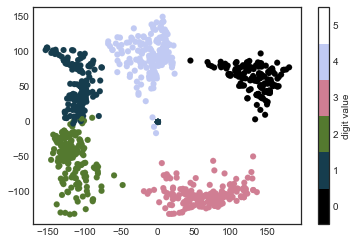

In [47]:
# Отображаем цифры на двумерное пространство с помощью функции IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# Выводим результаты на график
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
# Цифровые значения
plt.clim(-0.5, 5.5)

Задача №7: сетки графиков к субграфиками

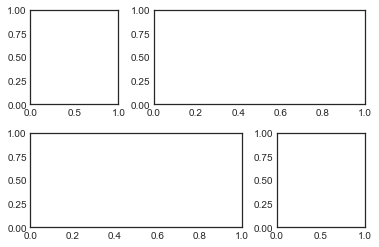

In [48]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

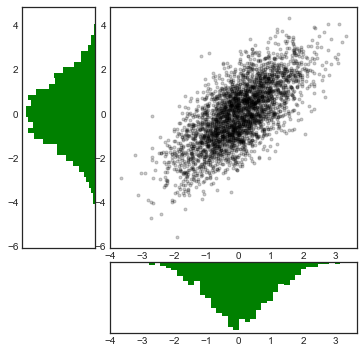

In [53]:
#создании графиков гистограмм с несколькими системами координат

# Создаем нормально распределенные данные 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Задаем системы координат с помощью функции GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# Распределяем точки по основной системе координат

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# Рисуем гистограммы на дополнительных системах координат 
x_hist.hist(x, 40, histtype='stepfilled',orientation='vertical', color='green')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',orientation='horizontal', color='green')
y_hist.invert_xaxis()

Поясняющие записи

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

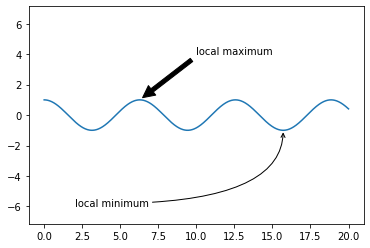

In [4]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
arrowprops=dict(arrowstyle="->", 
connectionstyle="angle3,angleA=0,angleB=-90"));

3D графики и архитекутра 

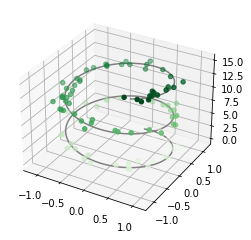

In [5]:
ax = plt.axes(projection='3d')
# Данные для трехмерной кривой 
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Данные для трехмерных точек
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Задача №8: package Basemap

In [ ]:
import os
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap

cities = pd.read_csv('data/california_cities.csv')
# Извлекаем интересующие нас данные
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

# 1. Рисуем фон карты
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# 2. Наносим данные по городам, отражая население разными цветами,
# а площадь – разными размерами точек
m.scatter(lon, lat, latlon=True,
c=np.log10(population), s=area,
cmap='Reds', alpha=0.5)
# 3. Создаем шкалу цветов и легенду
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)
# Делаем легенду с фиктивными точками
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
    label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
    labelspacing=1, loc='lower left');

Задача №9: library Seaborn

In [18]:
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

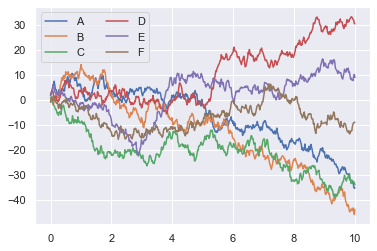

In [7]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Гистограммы, KDE и плотности

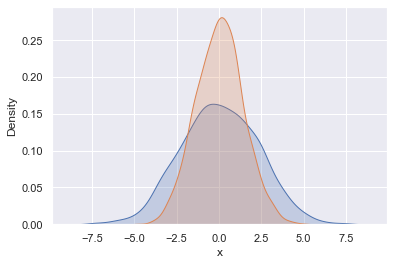

In [22]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    
#нормальное распределение    

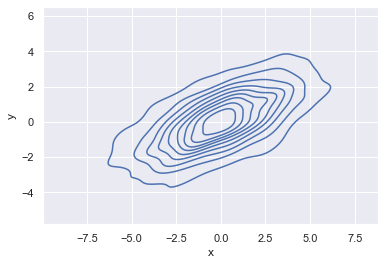

In [19]:
sns.kdeplot(data.x,data.y);

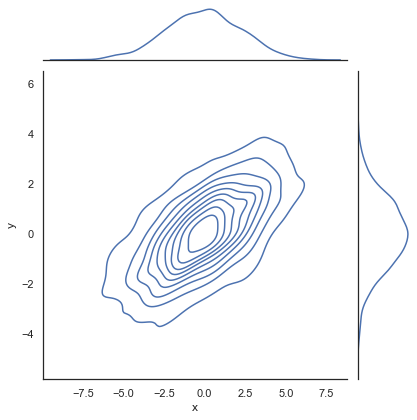

In [20]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

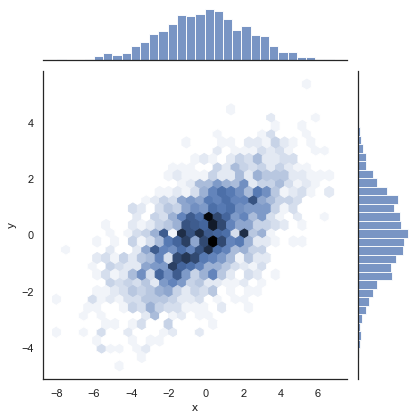

In [21]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

Совместные распределения

Аналогично графикам пар, которые мы рассматривали ранее, мы можем воспользоваться функцией sns.jointplot для отображения совместного распределения между различными наборами данных, а также соответствующих частных распределений.

Рассмотрим данные, отображающие суммы, которые персонал ресторана получает в качестве чаевых, в зависимости от данных различных индикаторов.

In [26]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


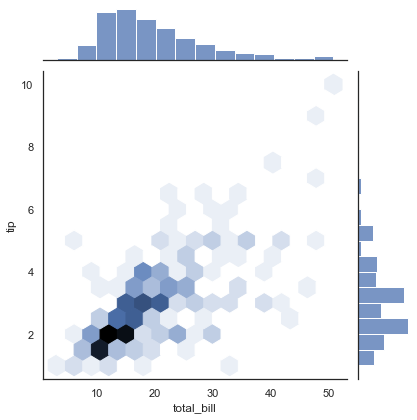

In [24]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

График совместного распределения позволяет даже выполнять автоматическую ядерную оценку плотности распределения и регрессию.

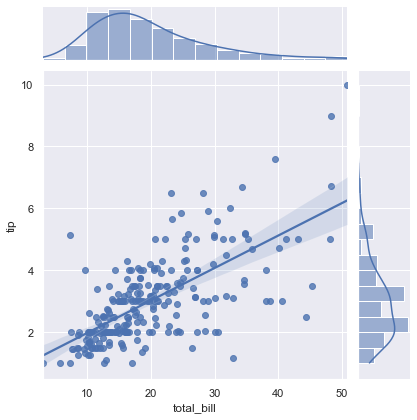

In [25]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

Задача №10

Пример: время прохождения марафона

В этом разделе мы рассмотрим использование библиотеки Seaborn для визуализации и анализа данных по времени прохождения марафонской дистанции.

In [29]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 44  836k   44  369k    0     0   367k      0  0:00:02  0:00:01  0:00:01  367k
100  836k  100  836k    0     0   575k      0  0:00:01  0:00:01 --:--:--  575k


In [30]:
data = pd.read_csv('data\marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


По умолчанию библиотека Pandas загружает столбцы с временем как строки 
Python (тип object), убедиться в этом можно, посмотрев значение атрибута dtypes
объекта DataFrame:

Исправим это, создав функцию для преобразования значений времени

In [ ]:
import pandas as pd
from pandas import datetools

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)
data = pd.read_csv('marathon-data.csv',
    converters={'split':convert_time, 
    'final':convert_time})
data.head()